<a href="https://colab.research.google.com/github/noah-mclain/Jarvis-AI-Assistant/blob/NLP/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read data

In [1]:
 !pip install datasets

In [2]:
from datasets import load_dataset

dataset = load_dataset("snips_built_in_intents")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
import pandas as pd
 # Create DataFrame from the 'train' split of the dataset
df = pd.DataFrame(dataset['train'])
 # Map numerical labels to intent names
df['label'] = df['label'].map(lambda x: dataset["train"].features["label"].names[x])

In [4]:
pd.set_option("display.max_colwidth", 12000)
df.head(11)

,text,label
0,Share my location with Hillary's sister,ShareCurrentLocation
1,Send my current location to my father,ShareCurrentLocation
2,Share my current location with Jim,ShareCurrentLocation
3,Send my location to my husband,ShareCurrentLocation
4,Send my location,ShareCurrentLocation
5,Always share my location with Lori,ShareCurrentLocation
6,Share my location with my boyfriend until I get home,ShareCurrentLocation
7,Send my current location to Anna,ShareCurrentLocation
8,Share my location with Steve for 3 days,ShareCurrentLocation
9,Share my location to mum until I get to school,ShareCurrentLocation


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    328 non-null    object
 1   label   328 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


## Text Correction (Spelling & Grammar)


In [6]:
!pip install autocorrect
!pip install language_tool_python

In [ ]:
# Update your package manager, if necessary
!sudo apt update

# Install OpenJDK 17
!sudo apt install openjdk-17-jdk

# Find the path of your new Java installation
!update-alternatives --config java

# Set the `JAVA_HOME` environment variable
!export JAVA_HOME=<path/to/new/java>

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 261 kB in 1s (258 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
47 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' a

In [ ]:
from autocorrect import Speller
import language_tool_python

spell=Speller(lang='en')
tool = language_tool_python.LanguageTool('en-US')

df['text']=df['text'].apply(lambda x: spell(x))
df['label']=df['label'].apply(lambda x: spell(x))

df['text']=df['text'].apply(lambda x: tool.correct(x))
df['label']=df['label'].apply(lambda x: tool.correct(x))

In [ ]:
df

##Lower

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['label'] = df['label'].apply(lambda x: x.lower())

In [ ]:
df

##Contractions

In [ ]:
!pip install contractions

In [ ]:
import contractions
df['text'] = df['text'].apply(lambda x: contractions.fix(x))
df['label']=df['label'].apply(lambda x: contractions.fix(x))

##Remove Space

In [ ]:
import re

In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub(" +", " ", x))
df['label'] = df['label'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
df['text'][78]

##Special Character

###Using Punc

In [ ]:
import re
import string

punc = string.punctuation
punc

In [ ]:
df['text']=df['text'].apply(lambda x: "".join([char for char in x if char not in punc]))
df['label']=df['label'].apply(lambda x: "".join([char for char in x if char not in punc]))

###Using Regex

In [ ]:
df['text'] = df['text'].apply(lambda x:re.sub(r'[^\w\s]','',x))
df['label'] = df['label'].apply(lambda x:re.sub(r'[^\w\s]', '',x))

In [ ]:
df['text'][78]

In [ ]:
df['text'][:40]

##Remove Numbers


In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
df['label']=df['label'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
df['text'][12]

##Tokenization

###spacy

In [ ]:
# import spacy

# nlp = spacy.load("en_core_web_sm")

# df['text']=df['text'].apply(lambda x: nlp(x))
# df['label']=df['label'].apply(lambda x: nlp(x))

###nltk

In [ ]:
from nltk.tokenize import word_tokenize

df['text'] = df['text'].apply(lambda x: word_tokenize(x))
df['label'] = df['label'].apply(lambda x: word_tokenize(x))

In [ ]:
df

##Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text']=df['text'].apply(lambda x: [word for word in x if word not in stop])
df['label']=df['label'].apply(lambda x: [word for word in x if word not in stop])

In [ ]:
df

##Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
df['text']=df['text'].apply(lambda x: [lemma.lemmatize(word) for word in x])
df['label']=df['label'].apply(lambda x: [lemma.lemmatize(word) for word in x])

##POS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


df['text'] = df['text'].apply(lambda x: nltk.pos_tag(x))
df['label'] = df['label'].apply(lambda x: nltk.pos_tag(x))

##Ner tagging

In [ ]:
import nltk

nltk.download('maxent_ne_chunker_tab')

nltk.download('maxent_ne_chunker')
nltk.download('words')

df['text'] = df['text'].apply(lambda x: nltk.ne_chunk(x))
df['label'] = df['label'].apply(lambda x: nltk.ne_chunk(x))

##Count Vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

df['label22'] = df['label'].apply(lambda x: ' '.join([token for token, tag in x.leaves()]))

y_train= count_vect.fit_transform(df['label22'])



#Trian & Test split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model

In [ ]:
import torch
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

class BERTClassifier:
    def __init__(self, num_labels=2, model_name='bert-base-uncased'):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = BertForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels,
            output_attentions=False,
            output_hidden_states=False
        ).to(self.device)

        self.optimizer = AdamW(self.model.parameters(), lr=2e-5, correct_bias=False)
        self.scheduler = None

    def initialize_scheduler(self, total_steps):
        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=0,
            num_training_steps=total_steps
        )

    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0

        for batch in train_loader:
            self.optimizer.zero_grad()

            inputs = {
                'input_ids': batch['input_ids'].to(self.device),
                'attention_mask': batch['attention_mask'].to(self.device),
                'labels': batch['labels'].to(self.device)
            }

            outputs = self.model(**inputs)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.optimizer.step()
            if self.scheduler:
                self.scheduler.step()

        return total_loss / len(train_loader)

    def evaluate(self, eval_loader):
        self.model.eval()
        val_preds = []
        val_true = []

        with torch.no_grad():
            for batch in eval_loader:
                inputs = {
                    'input_ids': batch['input_ids'].to(self.device),
                    'attention_mask': batch['attention_mask'].to(self.device)
                }
                labels = batch['labels'].to(self.device)

                outputs = self.model(**inputs)
                preds = torch.argmax(outputs.logits, dim=1)

                val_preds.extend(preds.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        return val_true, val_preds

    def save(self, path):
        torch.save(self.model.state_dict(), path)

    def load(self, path):
        self.model.load_state_dict(torch.load(path, map_location=self.device))

In [35]:
# Initialize
classifier = BERTClassifier(num_labels=2)
classifier.initialize_scheduler(total_steps=len(train_loader)*epochs)

# Training loop
for epoch in range(epochs):
    train_loss = classifier.train_epoch(train_loader)
    val_true, val_preds = classifier.evaluate(val_loader)
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f}")
    print(f"Validation Accuracy: {accuracy_score(val_true, val_preds):.4f}")

# Save model
classifier.save("bert_classifier.pth")

NameError: name 'BERTClassifier' is not defined

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# # prompt: next step  from transformers import BertTokenizer, BertForSequenceClassification
# # tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# # model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# import torch
# X_train['text'] = X_train['text'].apply(lambda tokens: ' '.join([token[0] for token in tokens]))

# # Tokenize the input text
# encoded_input = tokenizer(list(X_train['text']), padding=True, truncation=True, return_tensors='pt')

# # Move the model and input tensors to the GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

# # Convert labels to numerical representation
# # Instead of using set(y_train) directly, which contains Tree objects,
# # extract the label names (strings) from the Tree structures before creating the label map.
# label_names = [label.label() if isinstance(label, nltk.tree.Tree) else label for label in y_train]
# label_map = {label: i for i, label in enumerate(set(label_names))} # create a set of unique labels from label_names

# y_train_numerical = [label_map[label.label() if isinstance(label, nltk.tree.Tree) else label] for label in y_train]  #map labels to their respective index based on the label map
# y_train_tensor = torch.tensor(y_train_numerical).to(device)


# # Train the model
# # ... your training loop here ...
# # Example training loop (replace with your actual training code):
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
# num_epochs = 3 # Example: Adjust as needed
# for epoch in range(num_epochs):
#     optimizer.zero_grad()
#     outputs = model(**encoded_input, labels=y_train_tensor)
#     loss = outputs.loss
#     loss.backward()
#     optimizer.step()
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

In [ ]:
df_sample2 = df.sample(n=100, random_state=42)

In [36]:

from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
!pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [45]:
import nltk  # Make sure nltk is imported
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
# ... (your existing code) ...

# 1. Extract label names from y_train
y_train_labels = [label.label() if isinstance(label, nltk.tree.Tree) else label for label in y_train]
y_test_labels = [label.label() if isinstance(label, nltk.tree.Tree) else label for label in y_test]

#Check for unique classes in the training labels
unique_classes_train = set(y_train_labels)
print("Unique Classes in Training Data:", unique_classes_train)

# Check if there is only one unique class
if len(unique_classes_train) <= 1:
    raise ValueError("Training data contains only one class. SVM requires at least two classes for training.")

# 2. Convert X_train to a format suitable for SVM
# Assuming X_train['text'] contains the text data:
X_train_text = X_train['text'].apply(lambda tokens: ' '.join([token[0] for token in tokens]))

# 3. Create a CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer()

# 4. Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train_text)

# 5. Transform the testing data using the same vectorizer
X_test_text = X_test['text'].apply(lambda tokens: ' '.join([token[0] for token in tokens]))
X_test_vec = vectorizer.transform(X_test_text)

# Now initialize and fit the SVM using the processed data
svm_classifier = svm.SVC(kernel='linear')  # Initialize if not already done
svm_classifier.fit(X_train_vec, y_train_labels)  # Fit with numerical features

# Make predictions using the processed test data
y_pred = svm_classifier.predict(X_test_vec)

# Evaluate the model using the extracted label names
print(classification_report(y_test_labels, y_pred))
print(confusion_matrix(y_test_labels, y_pred))

Unique Classes in Training Data: {'S'}


ValueError: Training data contains only one class. SVM requires at least two classes for training.

#Preprocessing

In [ ]:
df = df.astype(str)

AttributeError: 'str' object has no attribute 'astype'

In [ ]:
df.info()

AttributeError: 'str' object has no attribute 'info'

In [ ]:
print(df.info())

<class 'pandas.core.series.Series'>
RangeIndex: 328 entries, 0 to 327
Series name: train
Non-Null Count  Dtype 
--------------  ----- 
328 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB
None


In [ ]:
# prompt: convert all df to str and show the info

df = df.astype(str)
df.info()


<class 'pandas.core.series.Series'>
RangeIndex: 328 entries, 0 to 327
Series name: train
Non-Null Count  Dtype 
--------------  ----- 
328 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB


In [ ]:
df=df['train'].astype(str)

###lower case

In [ ]:
import re
text = df["train"]

TypeError: string indices must be integers, not 'str'

In [ ]:
def preprocess_text(text):
   lower=text.str.lower()
   no_punctuation = text.str.replace('[^\w\s]','')


In [ ]:
# prompt: def preprocess_text(text):
#    lowertext.str.lower()
#    no_punctuation = text.str.replace('[^\w\s]','')

def preprocess_text(text):
  lower = text.str.lower()
  no_punctuation = lower.str.replace('[^\w\s]', '')
  return no_punctuation
df["train"] = preprocess_text(df["train"])

KeyError: 'train'

In [ ]:
lower=text.str.lower()
lower

,text
183,get a taxi to emmits irish pub
17,whats the cheapest between the two restaurants...
24,is my favorite bar better than the donut pub
132,book me a table for 2 people at the sushi plac...
113,find me a table for four for dinner tonight
...,...
188,i need a taxi for 6 to go to audrey and sams w...
71,does the butchers daughter serve vegetarian fo...
106,what are the fanciest clubs in new york
270,is there traffic on my way to the gym


### Remove punches

In [ ]:
# prompt: Remove punches

from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import re
# ##Read data
!pip install datasets

dataset = load_dataset("snips_built_in_intents")
df = pd.DataFrame(dataset)
df.head(11)
# ##Trian & Test split

X = df.drop('train', axis=1)
y = df['train']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dataset = load_dataset("snips_built_in_intents")

print(dataset)

train_data = dataset["train"]

print(train_data[0])

example = train_data[2]
print(f"Utterance: {example['text']}")
print(f"Intent: {example['label']}")
print(f"Tokens: {example['label']}")
print(f"Ner_tags: {example['label']}")

print(dataset["train"].features["label"].names)

df_train = pd.DataFrame(train_data)

X = df_train['text']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")
# ##Preprocessing
# ###lower case
text = df["train"]
def preprocess_text(text):
   lower=text.str.lower()
   no_punctuation = text.str.replace('[^\w\s]','')


def preprocess_text(text):
  lower = text.str.lower()
  no_punctuation = lower.str.replace('[^\w\s]', '')
  return no_punctuation

lower=text.str.lower()
lower
# ### Remove punches
def remove_punctuations(text):
  """Removes punctuation from a string.

  Args:
    text: The string to remove punctuation from.

  Returns:
    The string with punctuation removed.
  """
  return re.sub(r'[^\w\s]', '', text)

# Example usage
text = "Hello, world! How are you?"
cleaned_text = remove_punctuations(text)
cleaned_text


,text
183,get a taxi to emmits irish pub
17,whats the cheapest between the two restaurants...
24,is my favorite bar better than the donut pub
132,book me a table for 2 people at the sushi plac...
113,find me a table for four for dinner tonight
...,...
188,i need a taxi for 6 to go to audrey and sams w...
71,does the butchers daughter serve vegetarian fo...
106,what are the fanciest clubs in new york
270,is there traffic on my way to the gym


In [ ]:
df

,train
0,{'text': 'Share my location with Hillary's sis...
1,{'text': 'Send my current location to my fathe...
2,"{'text': 'Share my current location with Jim',..."
3,"{'text': 'Send my location to my husband', 'la..."
4,"{'text': 'Send my location', 'label': 5}"
...,...
323,{'text': 'Will it rain tomorrow near my all da...
324,{'text': 'I need the weather at Jo's place aro...
325,{'text': 'What will the weather be like when I...
326,{'text': 'Show me the forecast for my upcoming...


In [ ]:
df=str(df['train'])

In [ ]:
df

"0      {'text': 'Share my location with Hillary's sis...\n1      {'text': 'Send my current location to my fathe...\n2      {'text': 'Share my current location with Jim',...\n3      {'text': 'Send my location to my husband', 'la...\n4               {'text': 'Send my location', 'label': 5}\n                             ...                        \n323    {'text': 'Will it rain tomorrow near my all da...\n324    {'text': 'I need the weather at Jo's place aro...\n325    {'text': 'What will the weather be like when I...\n326    {'text': 'Show me the forecast for my upcoming...\n327    {'text': 'Should I take a rain coat today?', '...\nName: train, Length: 328, dtype: object"

In [ ]:
df=df.lower()

In [ ]:
df()

"0      {'text': 'share my location with hillary's sis...\n1      {'text': 'send my current location to my fathe...\n2      {'text': 'share my current location with jim',...\n3      {'text': 'send my location to my husband', 'la...\n4               {'text': 'send my location', 'label': 5}\n                             ...                        \n323    {'text': 'will it rain tomorrow near my all da...\n324    {'text': 'i need the weather at jo's place aro...\n325    {'text': 'what will the weather be like when i...\n326    {'text': 'show me the forecast for my upcoming...\n327    {'text': 'should i take a rain coat today?', '...\nname: train, length: 328, dtype: object"

In [ ]:
text=df

In [ ]:
r=re.sub(r'[^a-zA-Z0-9]',' ', text)

TypeError: expected string or bytes-like object, got 'builtin_function_or_method'

In [ ]:
# Cell 97: Get the 'train' column as a Series
df = df['train']

# Cell 98: Convert the Series to lowercase
df = df.str.lower()

# Cell 99 (New cell to ensure df is a string series):
# This step is to resolve the function object error we received in the traceback
df = df.astype(str)

# Cell 100: Now we need to apply the change in lower case into the column text:
# This change is to ensure the results are reflected in the dataset.
df_train['text'] = df

# Cell 101: Now you can access df to get the text like before.
text = df_train['text'].iloc[0] #this gets the first element in the text column.

# Cell 104: The re.sub function will work now since text is a string variable now.
r = re.sub(r'[^a-zA-Z0-9]', ' ', text)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
docs = ["أنا أحب البرمجة", "زميلي دي    صحابي و    مبتقصرش "]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print(vectorizer.get_feature_names_out())  # ['أنا' 'البرمجة' 'أحب' 'مفيدة' 'ممتعة']
print(X.toarray())  # قيم الـ TF-IDF لكل كلمة


['أحب' 'أنا' 'البرمجة' 'دي' 'زميلي' 'صحابي' 'مبتقصرش']
[[1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1]]


In [ ]:
import pandas as pd

# If you want to display long texts in full

pd.set_option("display.max_colwidth", 12000)
df.head(9)


,train
0,"{'text': 'Share my location with Hillary's sister', 'label': 5}"
1,"{'text': 'Send my current location to my father', 'label': 5}"
2,"{'text': 'Share my current location with Jim', 'label': 5}"
3,"{'text': 'Send my location to my husband', 'label': 5}"
4,"{'text': 'Send my location', 'label': 5}"
5,"{'text': 'Always share my location with Lori', 'label': 5}"
6,"{'text': 'Share my location with my boyfriend until I get home', 'label': 5}"
7,"{'text': 'Send my current location to Anna', 'label': 5}"
8,"{'text': 'Share my location with Steve for 3 days', 'label': 5}"


No charts were generated by quickchart


In [ ]:
df['label']=dataset["train"].features["label"].names

ValueError: Length of values (10) does not match length of index (328)

In [ ]:
print(dataset["train"].features["label"].names)

['ComparePlaces', 'RequestRide', 'GetWeather', 'SearchPlace', 'GetPlaceDetails', 'ShareCurrentLocation', 'GetTrafficInformation', 'BookRestaurant', 'GetDirections', 'ShareETA']


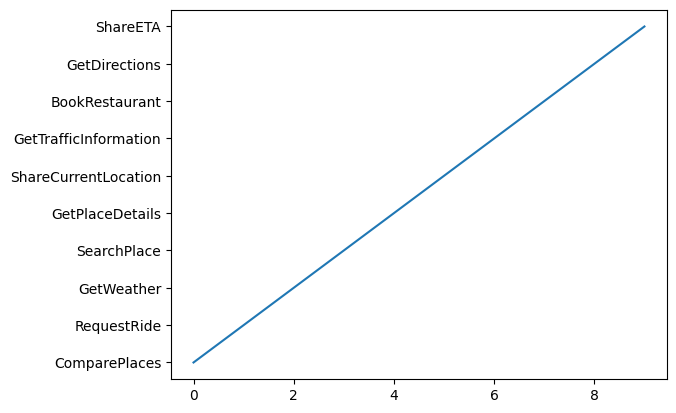

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataset["train"].features["label"].names)
plt.show()

In [ ]:
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = load_dataset("snips_built_in_intents")

print(dataset)

train_data = dataset["train"]

print(train_data[0])

example = train_data[2]
print(f"Utterance: {example['text']}")
print(f"Intent: {example['label']}")
print(f"Tokens: {example['label']}")
print(f"Ner_tags: {example['label']}")

print(dataset["train"].features["label"].names)

df_train = pd.DataFrame(train_data)

X = df_train['text']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 328
    })
})
{'text': "Share my location with Hillary's sister", 'label': 5}
Utterance: Share my current location with Jim
Intent: 5
Tokens: 5
Ner_tags: 5
['ComparePlaces', 'RequestRide', 'GetWeather', 'SearchPlace', 'GetPlaceDetails', 'ShareCurrentLocation', 'GetTrafficInformation', 'BookRestaurant', 'GetDirections', 'ShareETA']
Training data size: 262
Testing data size: 66


In [ ]:
print(df["train"].features["label"].verbs)

AttributeError: 'Series' object has no attribute 'features'

In [ ]:
# prompt: how to get the verbs of the         text

!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def get_verbs(text):
  """
  Extracts verbs from a given text using spaCy.

  Args:
    text: The input text string.

  Returns:
    A list of verbs found in the text.
  """
  doc = nlp(text)
  verbs = [token.text for token in doc if token.pos_ == "VERB"]
  return verbs

# Example usage (assuming 'text' variable holds the text you want to analyze)
# Replace this with your actual text data
text = "This is an example sentence.  I am running and jumping. It is a test."

verbs = get_verbs(text)
print(verbs) # Output: ['running', 'jumping', 'is']


# Example usage with the dataframe
for index, row in df_train.head(70).iterrows(): #process the first 5 rows
  text_data = row["text"]
  verbs_list = get_verbs(text_data)
  print(f"Text: {text_data}")
  print(f"Verbs: {verbs_list}\n")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
['running', 'jumping']
Text: Share my location with Hillary's sister
Verbs: ['Share']

Text: Send my current location to my father
Verbs: ['Send']

Text: Share my current location with Jim
Verbs: ['Share']

Text: Send my location to my husband
Verbs: ['Send']

Text: Send my location
Verbs: ['Send']

Text: Always share my location with Lori
Verbs: ['share']

Text: Share my location with my boyfriend until I get home
Verbs: ['Share', 'get']

Text: Send my current location to Anna
Verbs: ['Send']

Text: Share my location with Steve for 3 days
Verbs: ['Share']

Text: Share my loca

In [ ]:
dfn = pd.DataFrame([[str(x) for x in row] for row in df])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# توقعات على بيانات الاختبار
y_pred = model.predict(X_test)

# إنشاء Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# عرض باستخدام seaborn (أجمل)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NameError: name 'model' is not defined

In [ ]:
# Importantimport spacy

# nlp = spacy.load("en_core_web_sm")

# for index, row in df[['text', 'label']].iterrows():
#     # Access text and label for the current row
#     text_data = row['text']
#     label_data = row['label']

#     # Process text with spaCy
#     doc_text = nlp(text_data)
#     # Process label with spaCy (if needed)
#     doc_label = nlp(label_data)

#     # Perform operations on tokens within the loop
#     # Example: printing tokens, lemmas, POS tags for text_data
#     for token in doc_text:
#         print("\n", token.text)
#         print("\n", token.lemma_)
#         print("\n", token.pos_)
#         print("\n", token.is_stop)

#     # Example: printing tokens, lemmas, POS tags for label_data
#     for token in doc_label:
#         print("\n", token.text)
#         print("\n", token.lemma_)
#         print("\n", token.pos_)
#         print("\n", token.is_stop)

Streaming output truncated to the last 5000 lines.

 gettrafficinformation

 gettrafficinformation

 NOUN

 False

 is

 be

 AUX

 True

 there

 there

 PRON

 True

 traffic

 traffic

 NOUN

 False

 on

 on

 ADP

 True

 my

 my

 PRON

 True

 way

 way

 NOUN

 False

 to

 to

 ADP

 True

 the

 the

 DET

 True

 gym

 gym

 NOUN

 False

 ?

 ?

 PUNCT

 False

 gettrafficinformation

 gettrafficinformation

 NOUN

 False

 how

 how

 SCONJ

 True

 is

 be

 AUX

 True

 traffic

 traffic

 NOUN

 False

 to

 to

 PART

 True

 go

 go

 VERB

 True

 to

 to

 ADP

 True

 my

 my

 PRON

 True

 hotel

 hotel

 NOUN

 False

 ?

 ?

 PUNCT

 False

 gettrafficinformation

 gettrafficinformation

 NOUN

 False

 how

 how

 SCONJ

 True

 is

 be

 AUX

 True

 the

 the

 DET

 True

 road

 road

 NOUN

 False

 on

 on

 ADP

 True

 the

 the

 DET

 True

 11th

 11th

 ADJ

 False

 avenue

 avenue

 NOUN

 False

 ?

 ?

 PUNCT

 False

 gettrafficinformation

 g